# Graph Visualization of Star Citizen Ships
This notebook creates and visualizes a graph representation of the Star Citizen ships dataset.

In [1]:

# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [2]:
# Load and process data
data = pd.read_csv('data.csv')

# Nettoyer les noms de colonnes en enlevant les espaces
data.columns = data.columns.str.strip()

# Create connections between ships of the same manufacturer
"""manufacturer_edges = []
for manufacturer in data[' manufacturer'].unique():  # Note the space before 'manufacturer'
    ships = data[data[' manufacturer'] == manufacturer][' name'].tolist()  # Note the space before 'name'
    for i in range(len(ships)):
        for j in range(i + 1, len(ships)):
            manufacturer_edges.append((ships[i], ships[j], {'type': 'manufacturer'}))"""

"manufacturer_edges = []\nfor manufacturer in data[' manufacturer'].unique():  # Note the space before 'manufacturer'\n    ships = data[data[' manufacturer'] == manufacturer][' name'].tolist()  # Note the space before 'name'\n    for i in range(len(ships)):\n        for j in range(i + 1, len(ships)):\n            manufacturer_edges.append((ships[i], ships[j], {'type': 'manufacturer'}))"

In [3]:
ships_by_role = {'Starter': ['100i',
  '125a',
  '135c',
  'Aurora ES',
  'Cutter',
  'Cutter Rambler',
  'Nomad',
  'Reliant Kore'],
 'Touring': ['100i',
  '300i',
  '400i',
  '600i Touring',
  '85X',
  'G12',
  'PTV',
  'Ranger CV',
  'X1'],
 'Light Fighter': ['125a',
  '325a',
  'Arrow',
  'Aurora LN',
  'Aurora MR',
  'Blade',
  'Defender',
  'Gladius',
  'Hawk',
  'Khartu-Al',
  'Mustang Delta',
  'Reliant Tana',
  'Talon',
  'Talon Shrike'],
 'Light Freight': ['135c',
  'Aurora CL',
  'Avenger Titan',
  'Cutter',
  'Intrepid',
  'MPUV Cargo',
  'Reliant Kore'],
 'Luxury': ['300i', 'Razor LX'],
 'Pathfinder': ['315p',
  'Aurora ES',
  'Aurora LX',
  'F7C-R Hornet Tracker',
  'F7C-R Hornet Tracker Mk II',
  'Mustang Beta',
  'Terrapin'],
 'Interdiction': ['325a',
  'Avenger Stalker',
  'Avenger Warlock',
  'Buccaneer',
  'Cutlass Blue',
  'Sabre Raven',
  'Vanguard Sentinel',
  'Zeus MR Mk II'],
 'Racing': ['350r',
  'Cyclone RC',
  'Dragonfly',
  'Fury LX',
  'G12r',
  'HoverQuad',
  'M50',
  'Mustang Gamma',
  'Mustang Omega',
  'Nox',
  'P-72 Archimedes',
  'Pulse LX',
  'Ranger RC',
  'Razor',
  'Sabre Peregrine',
  'X1 Velocity'],
 'Expedition': ['600i Explorer',
  'C8X Pisces Expedition',
  'Carrack',
  'Constellation Aquila',
  'Corsair',
  'Cutter Rambler',
  'Freelancer DUR',
  'Odyssey',
  'Zeus ES Mk II'],
 'Luxury Touring': ['890 Jump', 'Constellation Phoenix'],
 'Bomber': ['A1 Spirit', 'Gladiator', 'Vanguard Harbinger'],
 'Heavy Bomber': ['A2 Hercules', 'Retaliator'],
 'Medical': ['Apollo Medivac',
  'Apollo Triage',
  'C8R Pisces',
  'Cutlass Red',
  'Terrapin Medic'],
 'Heavy Fighter': ['Ares Star Fighter Inferno',
  'Ares Star Fighter Ion',
  'F8C Lightning',
  'Guardian',
  'Guardian QI',
  'Hurricane',
  'Scorpius',
  'Scorpius Antares',
  'Vanguard Warden'],
 'Mining': ['Arrastra', 'MOLE', 'Prospector', 'ROC', 'ROC-DS'],
 'Refining': ['Arrastra'],
 'Industrial': ['ATLS'],
 'Military': ['Ballista', 'G12a'],
 'Medium Freight': ['C1 Spirit',
  'Constellation Andromeda',
  'Constellation Taurus',
  'Cutlass Black',
  'Freelancer',
  'Freelancer MAX',
  'Hull A',
  'RAFT',
  'Railen',
  'Starlancer MAX',
  'Zeus CL Mk II'],
 'Heavy Freight': ['C2 Hercules',
  'Caterpillar',
  'Hull B',
  'Hull C',
  'Hull D',
  'Hull E',
  'Merchantman'],
 'Exploration': ['C8 Pisces', 'Cyclone', 'Ursa'],
 'Combat': ['Centurion',
  'Cyclone TR',
  'Nova',
  'Pulse',
  'Ranger TR',
  'X1 Force'],
 'Gunship': ['Constellation Andromeda',
  'Freelancer MIS',
  'Paladin',
  'Redeemer'],
 'Heavy Repair': ['Crucible'],
 'Freight': ['CSV-SM'],
 'Dropship': ['Cutlass Steel', 'Prowler', 'Valkyrie', 'Vanguard Hoplite'],
 'Reconnaissance': ['Cutter Scout'],
 'Intelligence': ['Cutter Scout'],
 'Recon': ['Cyclone', 'Cyclone RN'],
 'Anti-aircraft': ['Cyclone AA'],
 'Assault': ['Cyclone MT'],
 'Passenger': ['E1 Spirit', 'Genesis', 'MPUV Personnel'],
 'Stealth Bomber': ['Eclipse'],
 'Heavy Science': ['Endeavor'],
 'Refinery': ['Expanse'],
 'Medium Fighter': ['F7A Hornet Mk I',
  'F7A Hornet Mk II',
  'F7C Hornet Mk I',
  'F7C Hornet Mk II',
  'F7C-M Super Hornet',
  'Glaive',
  'Sabre Firebird',
  "San'tok.yāi",
  'Scythe'],
 'Stealth Fighter': ['F7C-S Hornet Ghost',
  'F7C-S Hornet Ghost Mk II',
  'Sabre'],
 'Snub Fighter': ['Fury', 'Fury MX', 'P-52 Merlin'],
 'Modular': ['Galaxy'],
 'Heavy Gun Ship': ['Hammerhead'],
 'Medium Data': ['Herald', 'Mercury'],
 'Frigate': ['Idris-M', 'Idris-P'],
 'Armored Freight': ['Ironclad'],
 'Combined Arms Platform': ['Ironclad Assault'],
 'Destroyer': ['Javelin'],
 'Multi-Role': ['Kraken', 'Kraken Privateer'],
 'Light Carrier': ['Kraken', 'Kraken Privateer', 'Liberator'],
 'Boarding': ['Legionnaire'],
 'Luxury Transport': ['Lynx'],
 'Explorer': ['Lynx'],
 'Military Transport': ['M2 Hercules'],
 'Interdictor': ['Mantis'],
 'Medium Cargo': ['Mercury'],
 'Prospecting': ['MOLE', 'Prospector'],
 'Cargo Loader': ['MPUV Tractor'],
 'Transport': ['Mule', 'Spartan', 'STV'],
 'Cargo': ['Mustang Alpha'],
 'Minelayer': ['Nautilus'],
 'Heavy Mining': ['Orion'],
 'Gunboat': ['Perseus'],
 'Heavy Construction': ['Pioneer'],
 'Corvette': ['Polaris'],
 'Stealth': ['Razor EX'],
 'Heavy Salvage': ['Reclaimer'],
 'Reporting': ['Reliant Mako'],
 'Light Science': ['Reliant Sen'],
 'Recovery': ['SRV'],
 'Heavy Refuelling': ['Starfarer', 'Starfarer Gemini'],
 'Patrol': ['Starlancer TAC'],
 'Combat Support': ['Storm', 'Storm AA'],
 'Ambulance': ['Ursa', 'Ursa Medivac'],
 'Medium Repair': ['Vulcan'],
 'Medium Refuel': ['Vulcan'],
 'Light Salvage': ['Vulture']}

In [4]:
# Create connections for all roles
manufacturer_edges = []
role_edges_by_type = {}  # Dictionnaire pour stocker les arêtes par rôle

# Create manufacturer connections
for manufacturer in data['manufacturer'].unique():  # Note the space before 'manufacturer'
    ships = data[data['manufacturer'] == manufacturer]['name'].tolist()  # Note the space before 'name'
    for i in range(len(ships)):
        for j in range(i + 1, len(ships)):
            manufacturer_edges.append((ships[i], ships[j], {'type': 'manufacturer'}))

# Create edges for each role separately
for role, ships in ships_by_role.items():
    role_edges_by_type[role] = []  # Initialiser la liste d'arêtes pour ce rôle
    for i in range(len(ships)):
        for j in range(i + 1, len(ships)):
            role_edges_by_type[role].append((ships[i], ships[j], {'type': role}))

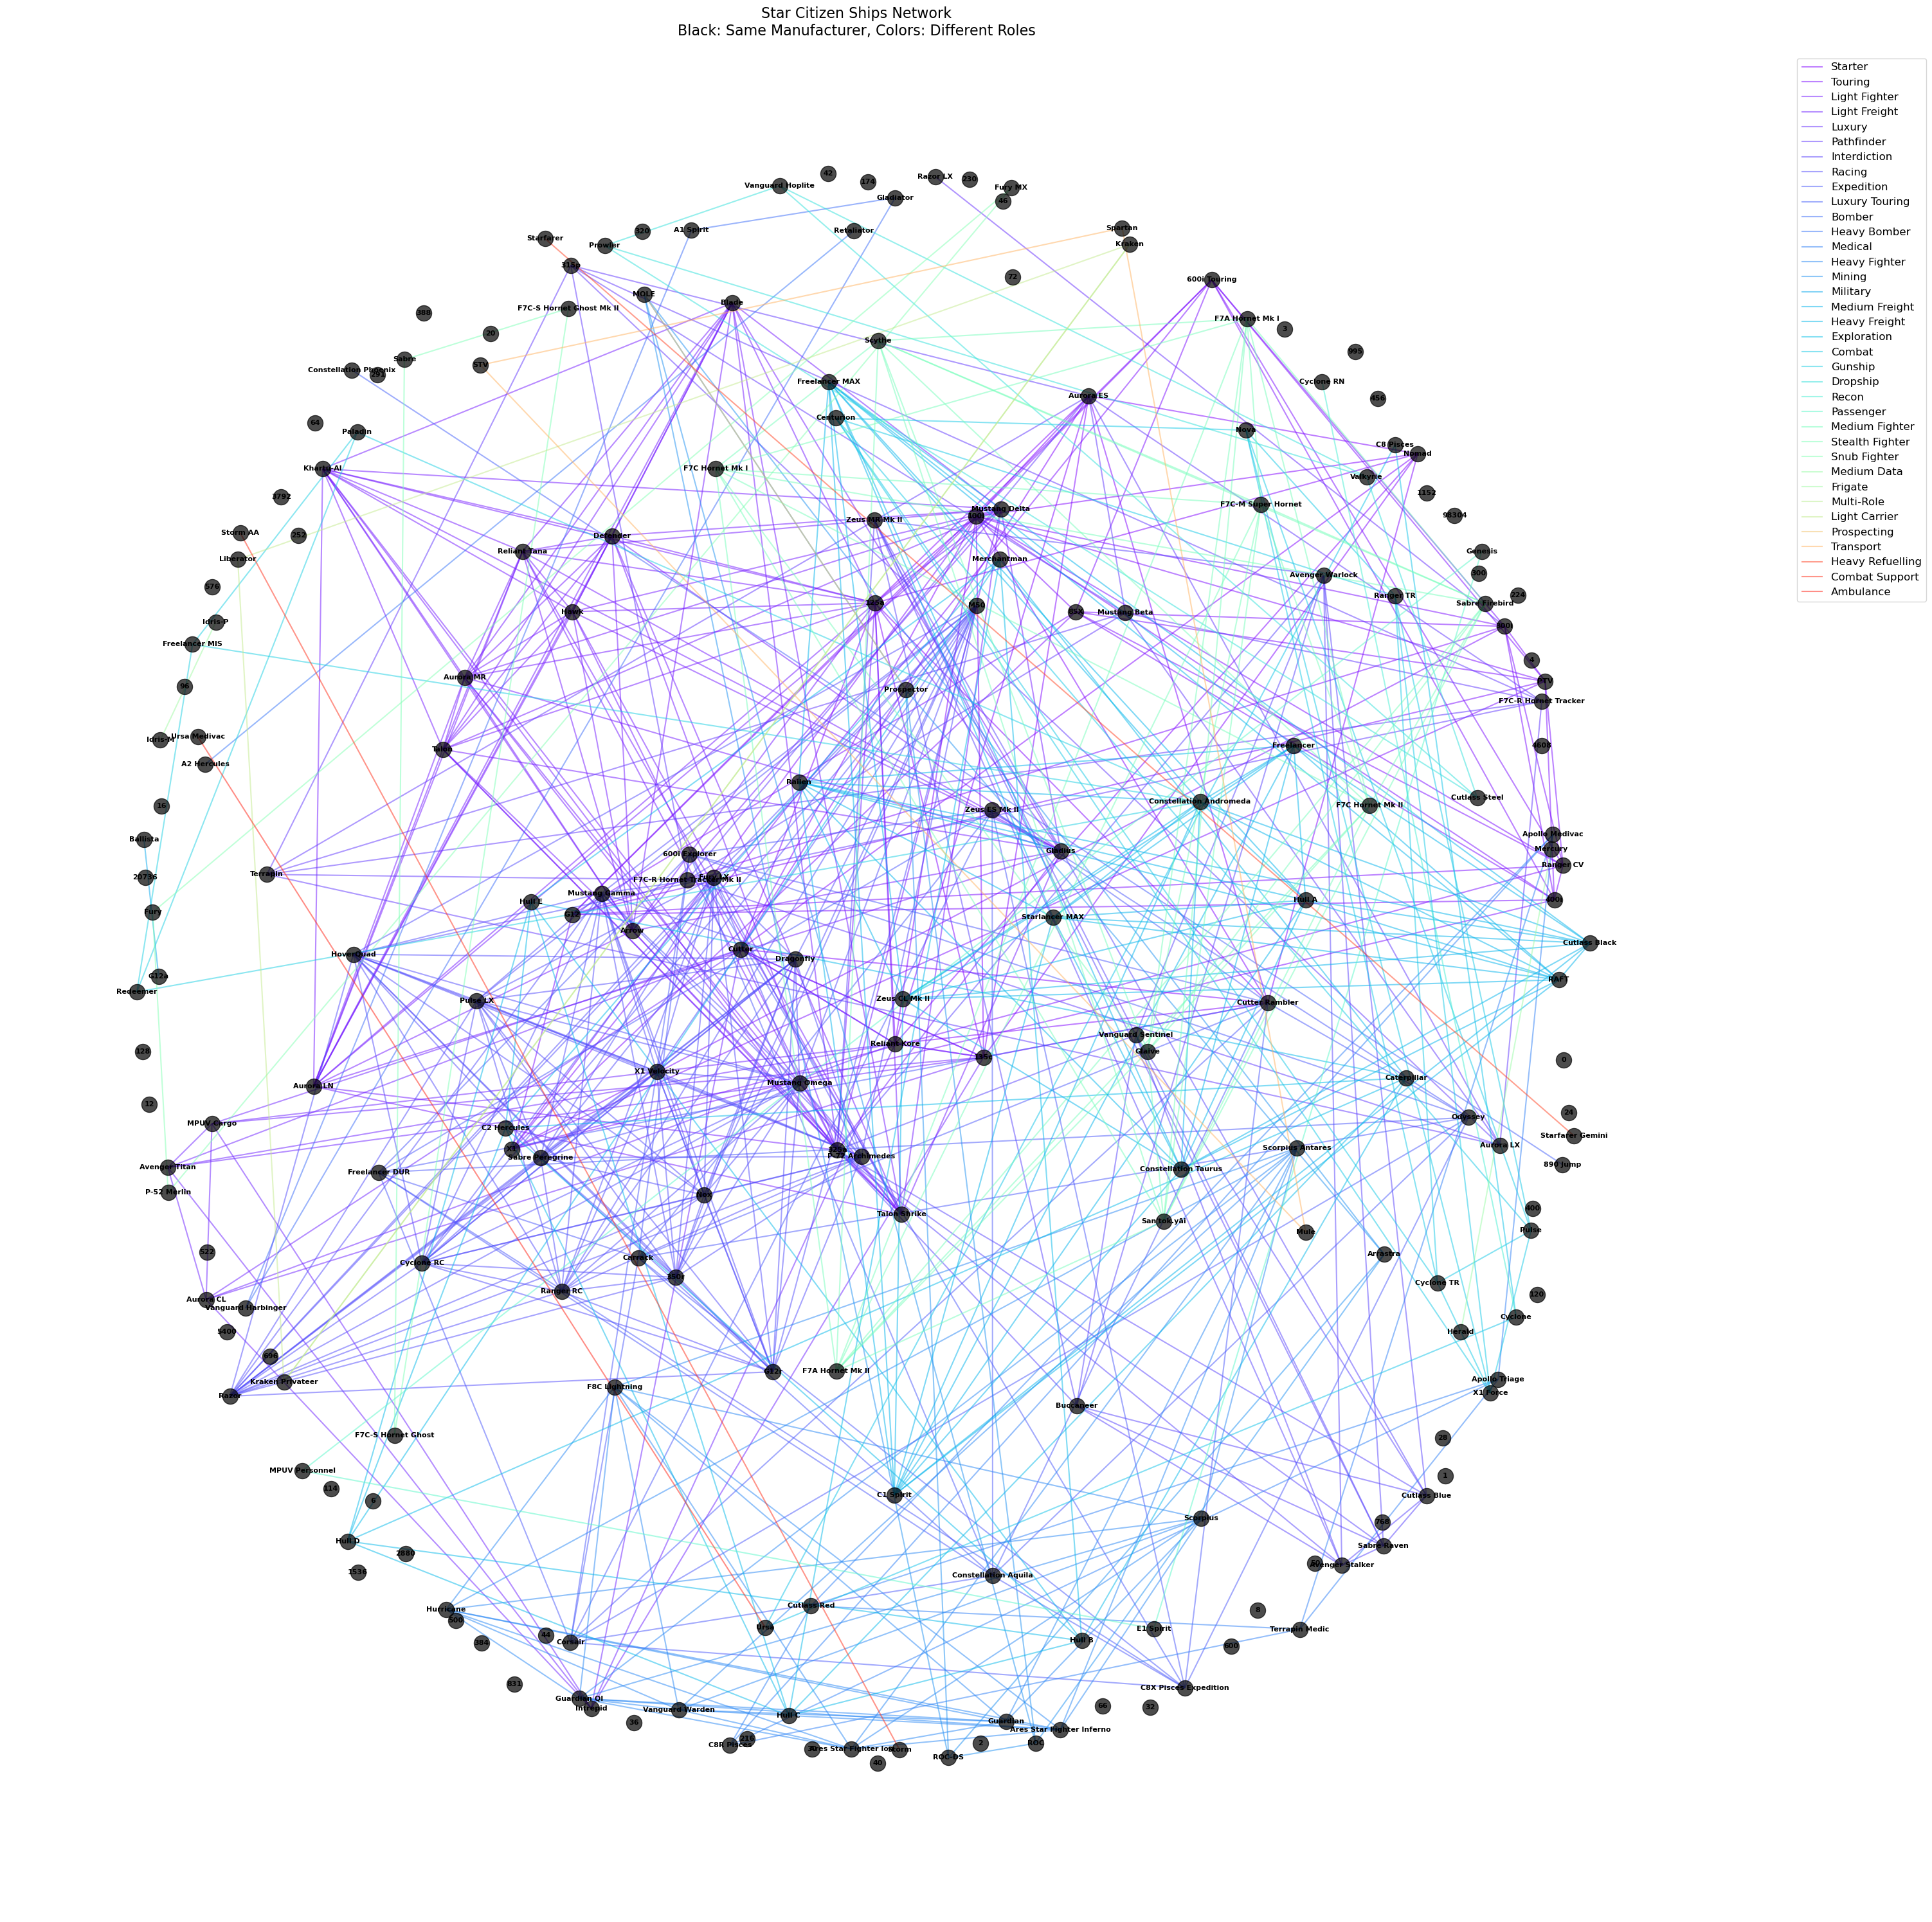

In [6]:
# Create graph
G = nx.Graph()

# Add nodes with all attributes
for _, row in data.iterrows():
    G.add_node(row['name'], 
               manufacturer=row['manufacturer'],
               type=row['type'],
               role=row['role'],
               mass=row['mass'],
               price=row['price'])

# Add manufacturer edges
#G.add_edges_from(manufacturer_edges)

# Add role edges
for role_edges in role_edges_by_type.values():
    G.add_edges_from(role_edges)

# Visualization
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=2, iterations=100)

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                      node_color='black',
                      node_size=300,
                      alpha=0.7)

# Draw manufacturer edges
"""nx.draw_networkx_edges(G, pos, 
                      edgelist=[(u, v) for (u, v, d) in G.edges(data=True) if d['type'] == 'manufacturer'],
                      edge_color='black', alpha=0.2, width=1)"""

# Draw role edges with different colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(role_edges_by_type)))
for (role, edges), color in zip(role_edges_by_type.items(), colors):
    edge_list = [(u, v) for (u, v, d) in edges]
    nx.draw_networkx_edges(G, pos, 
                          edgelist=edge_list,
                          edge_color=[color], alpha=0.5, width=1.5,
                          label=role)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.title("Star Citizen Ships Network\nBlack: Same Manufacturer, Colors: Different Roles", 
         fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()